# Analisis de datos sobre IRIS



Estos conjuntos de datos consisten en 3 tipos diferentes de IRIS (Setosa, Versicolor y Virginica) con longitud de pétalos y sépalos

![("https://es.wikipedia.org/wiki/Iris_(planta)")]

# Diccionario de variables

|Nombre Variable  |Rol |Tipo |Descripción |Unidades |Missing|
|---|---|---|---|---|---|
|sepal lenght|Feature|Continua|longitud del sépalo|cm|no||
|sepal width|Feature|Continua|anchura del sépalo|cm|no||
|petal lenght|Feature|Continua|longitud del petalo|cm|no||
|petal widht|Feature|Continua|anchura del pétalo|cm|no||
|calss|Target|Categorica|clase de iris: Iris Setosa, Iris Versicolor, Iris Virginica |0,1,2|no||

# Preparación y Carga de datos

## Librerias

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

# Carga de datos

In [25]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [26]:
variables =pd.DataFrame(data['data'], columns = data['feature_names'])
variables.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [27]:
variables['clase'] = data['target']
variables

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
# dict(zip(range(len(data['target_names'])), data['target_names']))

In [29]:
variables['clase'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'},inplace =True)
variables.to_parquet('iris.parquet', index = False) # Guardar DataFrame

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_21492\3031217515.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  variables['clase'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'},inplace =True)


In [30]:
df = pd.read_parquet('iris.parquet')

### Verificación inicial

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   clase              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
clase                0
dtype: int64

Se observa que no presenta Missing

In [33]:
df[df.duplicated(keep=False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


El duplicado observado posiblemente sea por el redondeo

### Observaciones 
1. No hay nulos.
2. Aunque hay duplicados podemos asumir que es por el redondeo o la proporción.
3. Los tipos de datos son correctos. 

## Limpieza y Preprocesado

#### Preprocesado

**Feature engineer**

In [34]:
df['area sepal (cm2)'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['area petal (cm2)'] = df['petal length (cm)'] * df['petal width (cm)']


Se crean las columnas de area del sepalo y area del petalo.

In [35]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase,area sepal (cm2),area petal (cm2)
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10,11.96
146,6.3,2.5,5.0,1.9,virginica,15.75,9.50
147,6.5,3.0,5.2,2.0,virginica,19.50,10.40
148,6.2,3.4,5.4,2.3,virginica,21.08,12.42


In [36]:
df = df [['sepal length (cm)',	'sepal width (cm)', 'area sepal (cm2)', 'petal length (cm)','petal width (cm)', 'area petal (cm2)', 'clase'	]]

In [37]:
df

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm),area petal (cm2),clase
0,5.1,3.5,17.85,1.4,0.2,0.28,setosa
1,4.9,3.0,14.70,1.4,0.2,0.28,setosa
2,4.7,3.2,15.04,1.3,0.2,0.26,setosa
3,4.6,3.1,14.26,1.5,0.2,0.30,setosa
4,5.0,3.6,18.00,1.4,0.2,0.28,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,20.10,5.2,2.3,11.96,virginica
146,6.3,2.5,15.75,5.0,1.9,9.50,virginica
147,6.5,3.0,19.50,5.2,2.0,10.40,virginica
148,6.2,3.4,21.08,5.4,2.3,12.42,virginica


## Observaciones

1. Se crearon dos variables para identificar el area del sépalo y el pétalo.
2. Se han organizado las columnas para llevar el orden que queremos.

## Análisis Descriptivo

In [38]:
df.describe()

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm),area petal (cm2)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,17.822867,3.758000,1.199333,5.794067
std,0.828066,0.435866,3.361854,1.765298,0.762238,4.712390
min,4.300000,2.000000,10.000000,1.000000,0.100000,0.110000
25%,5.100000,2.800000,15.660000,1.600000,0.300000,0.420000
50%,5.800000,3.000000,17.660000,4.350000,1.300000,5.615000
75%,6.400000,3.300000,20.325000,5.100000,1.800000,9.690000
max,7.900000,4.400000,30.020000,6.900000,2.500000,15.870000


In [39]:
df['clase'].value_counts(normalize = True)

clase
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

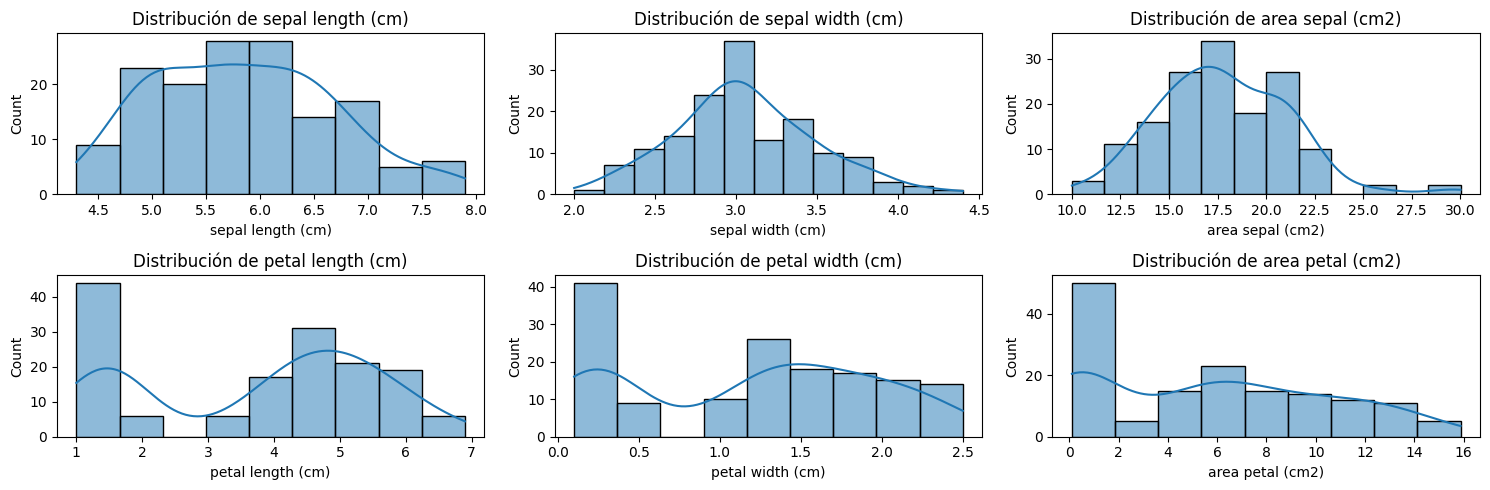

In [40]:
plt.figure(figsize=(15,5))

for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2,3,i+1)
    sns.histplot(data= df, x=feature, kde=True)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()

    

## Hallazgos descriptivos

- Dataset perfectamente balanceado (50 muestras por especie)
- Las medidas de los pétalos tienen mayor variabilidad que las de los sépalos
- Los rangos de medida son:
   - Sépalo 4.3-7.9 cm (largo), 2.0-4.4 (ancho), 10.0-30.0 cm**2 (area)
   - Pétalo: 1.0-6.9 cm (largo), 0.1-2.5 cm(ancho), 0.1-15.9 cm**2 (area)

# Análisis Exploratorio

In [41]:
df

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm),area petal (cm2),clase
0,5.1,3.5,17.85,1.4,0.2,0.28,setosa
1,4.9,3.0,14.70,1.4,0.2,0.28,setosa
2,4.7,3.2,15.04,1.3,0.2,0.26,setosa
3,4.6,3.1,14.26,1.5,0.2,0.30,setosa
4,5.0,3.6,18.00,1.4,0.2,0.28,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,20.10,5.2,2.3,11.96,virginica
146,6.3,2.5,15.75,5.0,1.9,9.50,virginica
147,6.5,3.0,19.50,5.2,2.0,10.40,virginica
148,6.2,3.4,21.08,5.4,2.3,12.42,virginica


<Figure size 1500x500 with 0 Axes>

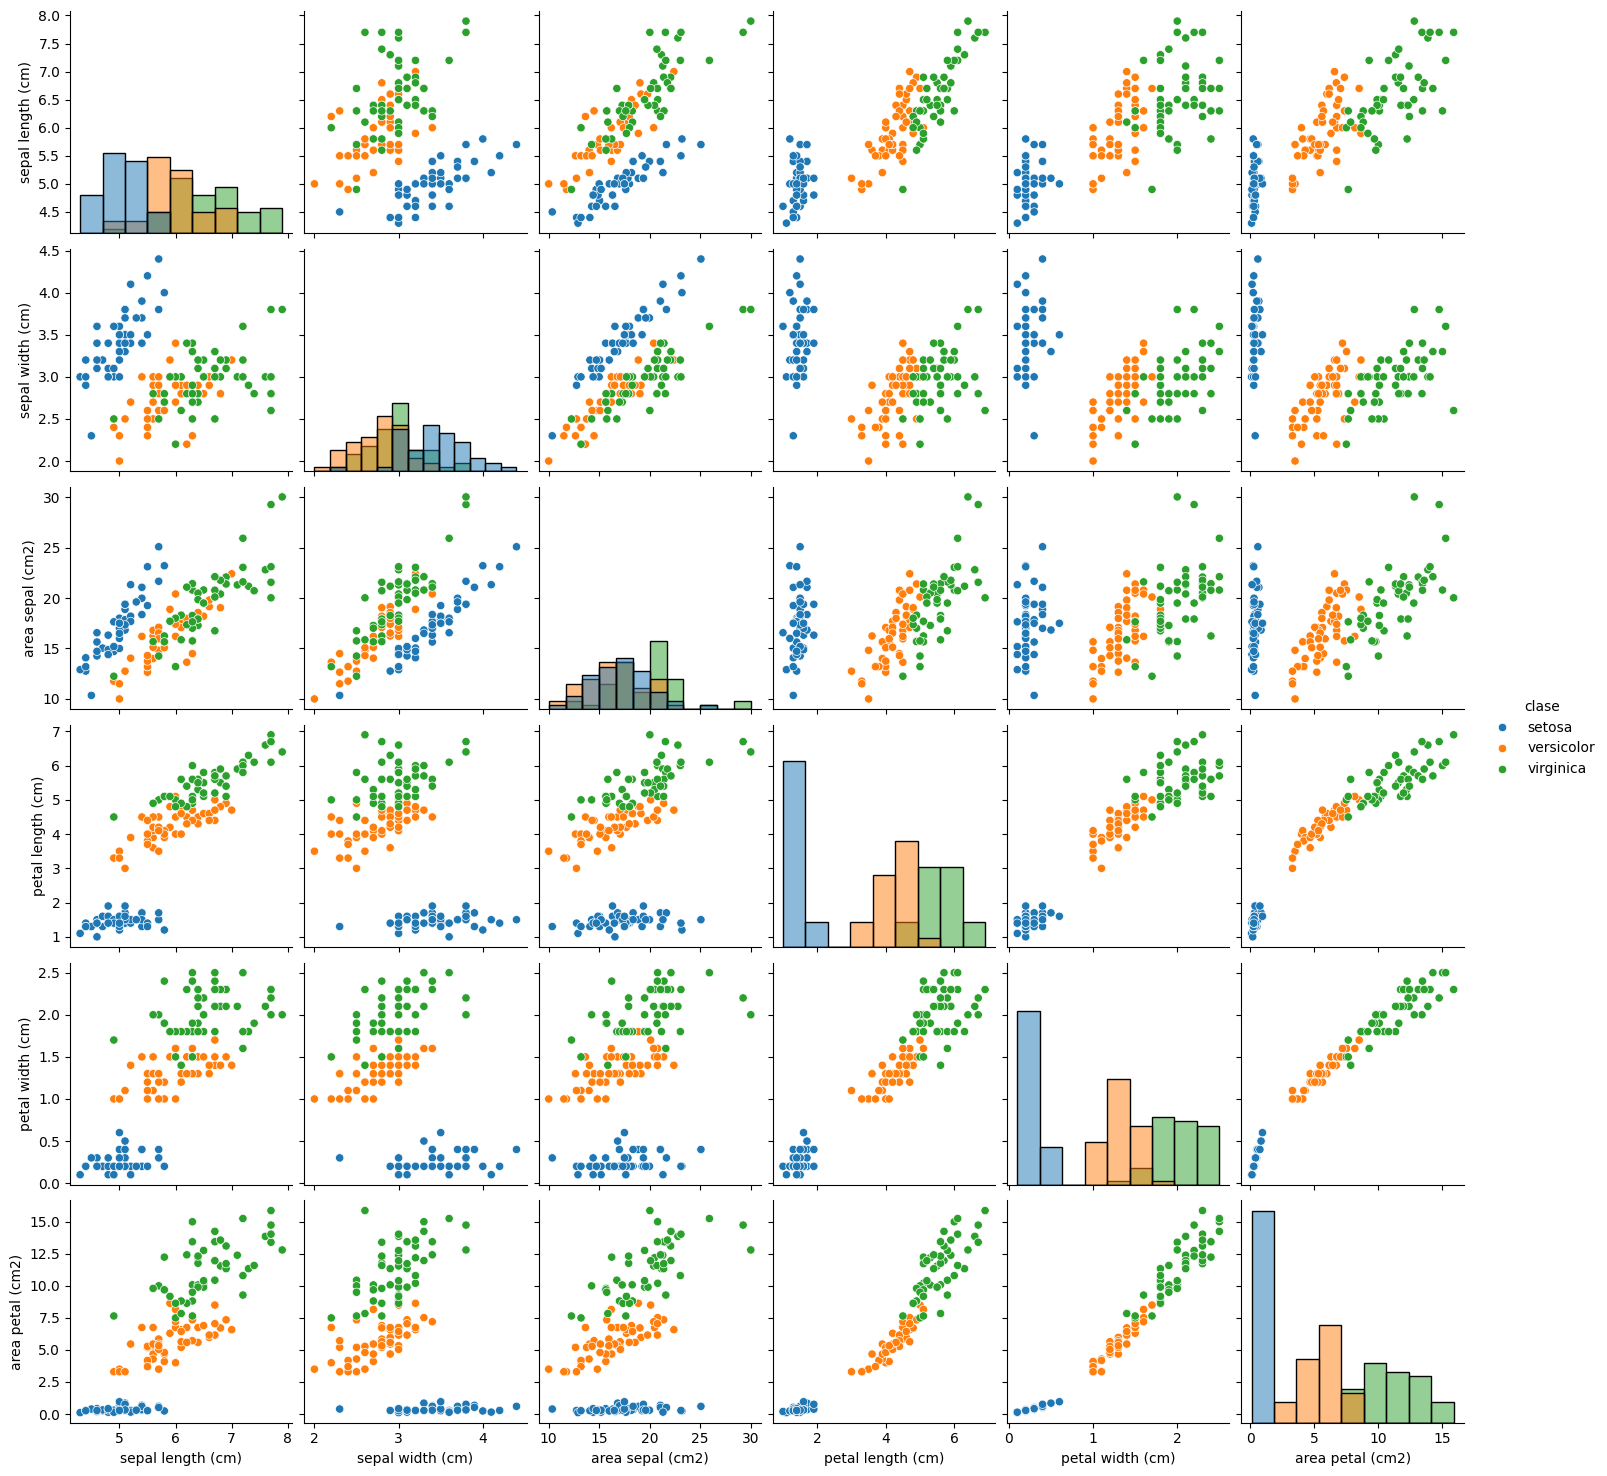

In [42]:
plt.figure(figsize=(15,5))
sns.pairplot(df,hue='clase', diag_kind='hist')
plt.show();

In [45]:
FEATURES = ['sepal length (cm)', 'sepal width (cm)',
            'petal length (cm)', 'petal width (cm)']

TARGET = ['clase']

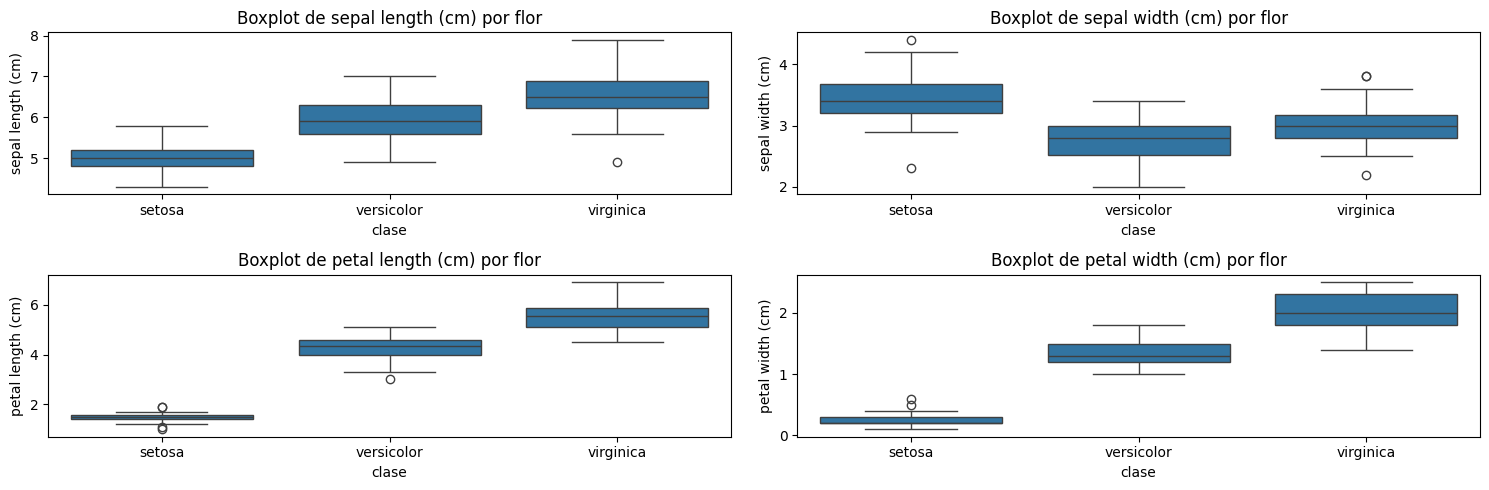

In [46]:
plt.figure(figsize=(15,5))
for i, col in enumerate(df[FEATURES].columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = df,x='clase', y= col)
    plt.title(f'Boxplot de {col} por flor')
plt.tight_layout()
plt.show();

<Axes: >

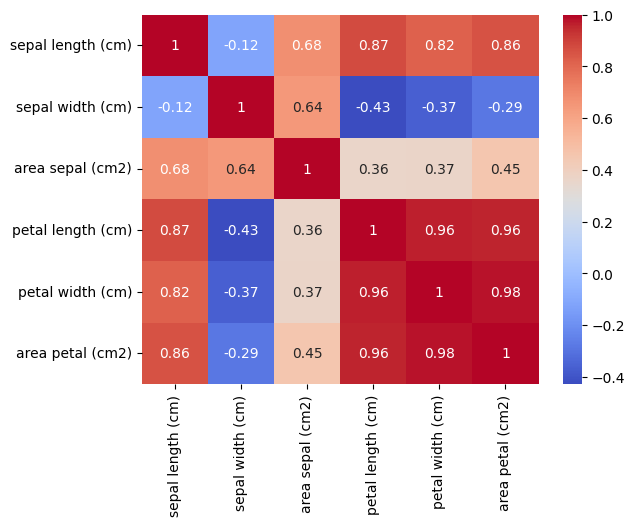

In [48]:
sns.heatmap(df.drop(columns='clase').corr(),annot=True, cmap='coolwarm')

### Hallazgos

- Existe clara separación entre setosa y las otras dos clases.
- Versicolor y virginica muestran cierto solapamiento.
- Fuerte correlación entre largo y ancho del pétalo.
- La flor setosa tiene pétalos notablemente mas pequeños.

## Análisis diagnóstico

### Analisis de la separabilidad de flores

Text(0.5, 1.0, 'Relación Sépalo')

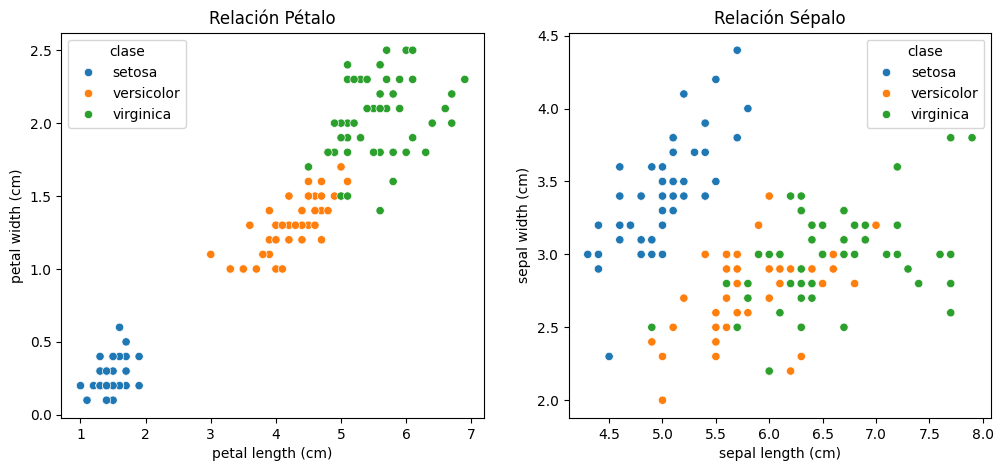

In [50]:
plt.figure(figsize=(12,5))
 # Relación de Pétalo
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='petal length (cm)', y='petal width (cm)', hue='clase')
plt.title('Relación Pétalo')

# Relación de Sépalo

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='sepal length (cm)',y='sepal width (cm)', hue='clase')
plt.title('Relación Sépalo')

In [ ]:
# Análisis de ratios

df['sepal ratio'] = df['petal length (cm)']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df)


### Hallazgos

- Las medidas del pétalo son mas útiles para describir las especies.
- Setosa es completamente separable usando medidas del pétalo.
- Los ratios proporcionan información adicional para la clasificiación.
- La varaiabilidad de medidas es menor en setosa.